In [22]:
# don't need to load extension everyf   time. 
%load_ext autoreload 

# This needs to be executed everytime.  
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os
import sys

# 현재 작업 디렉토리 가져오기
current_directory = os.getcwd()

# fmt: off
module_directory = os.path.join(
    current_directory, "..","thirdparty", "automatic")
if module_directory not in sys.path:
    sys.path.append(module_directory)

sys.path.append(os.path.join(current_directory, ".."))

In [24]:
import logging
from automatic.utils import *
Logger.init(LOGGER_AUTOMATIC, logging.DEBUG)
Logger.init("G2B", logging.DEBUG)

In [25]:
import automatic.selenium as s
# drv = s.create_driver()

from utils import edge
drv = edge.create_driver(headless=False, profile="market_")



In [26]:
# This needs to be executed everytime.  
%autoreload 2

import account
pw=account.account_get("g2b", "pw")
id=account.account_get("g2b", "id")
# 공동인증서(기업)
public_cert = account.account_get("g2b", "public_cert")
# 금융인증서서
financial_cert = account.account_get("g2b", "financial_cert")

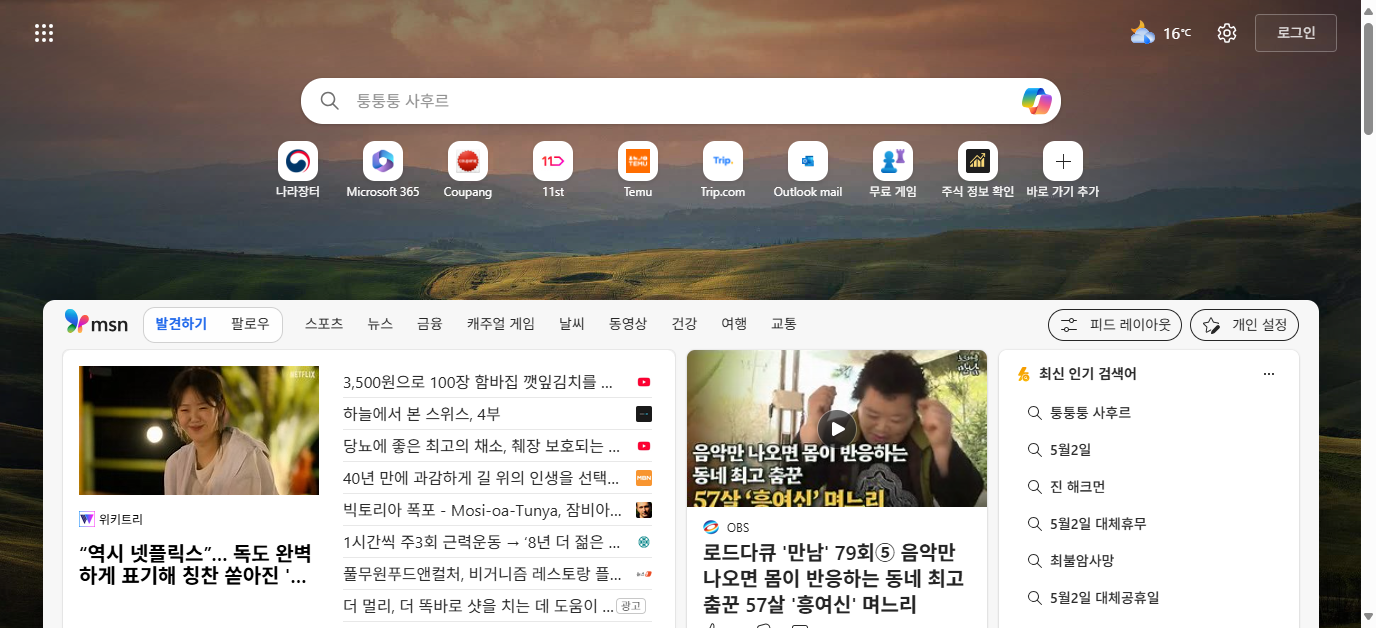

In [27]:
from IPython.display import Image, display
import time

# 화면 캡처 파일 저장 경로
screenshot_path = "screenshot.png"

# Selenium을 사용하여 화면 캡처
drv.save_screenshot(screenshot_path)

# Jupyter Notebook에 이미지 표시
display(Image(filename=screenshot_path))

In [28]:
# This needs to be executed everytime.  
%autoreload 2
from automatic.common.exceptions import ElementNotFoundException
from org.g2b.g2b_new_gen import G2B_new_gen

g2b = G2B_new_gen(drv, pw, id, public_cert, financial_cert)
try:
    g2b.login()
except ElementNotFoundException as e:
    e.context.capture("g2b_login_problem")


2025-04-18 22:14:27,645 - G2B - INFO - 로그인
2025-04-18 22:14:27,648 - G2B - INFO - 홈페이지로 이동
2025-04-18 22:14:27,652 - Automatic - DEBUG - go on G2B 홈페이지. path=https://www.g2b.go.kr
2025-04-18 22:14:37,172 - G2B - INFO - 팝업닫기
2025-04-18 22:14:37,174 - Automatic - DEBUG - exist on 팝업닫기. path=//input[@title='오늘 하루 이 창을 열지 않음']
2025-04-18 22:14:45,274 - Automatic - DEBUG - clicks on 팝업닫기. path=//input[@title='오늘 하루 이 창을 열지 않음']
2025-04-18 22:14:49,702 - G2B - INFO - 로그인
2025-04-18 22:14:49,705 - Automatic - DEBUG - exist on 로그아웃버튼. path=//span[text()='로그아웃']/../a
2025-04-18 22:15:00,291 - Automatic - DEBUG - clicks on 로그인버튼. path=mf_wfm_gnb_wfm_gnbTop_btnLogin
2025-04-18 22:15:03,600 - Automatic - DEBUG - click on 아이디/암호 탭. path=//a[text()='아이디/비밀번호']
2025-04-18 22:15:06,673 - Automatic - DEBUG - type on 아이디입력상자. path=mf_wfm_container_tabLgn_contents_content4_body_ibxLgnId
2025-04-18 22:15:07,393 - Automatic - DEBUG - type on 암호입력상자. path=mf_wfm_container_tabLgn_contents_content4_body_ibxLg

In [7]:
code="4810171401"
g2b.register(code)

2025-03-31 21:58:04,778 - G2B - INFO - 사전등록: ['4810171401']
2025-03-31 21:58:04,781 - Automatic - DEBUG - go on G2B 홈페이지. path=https://www.g2b.go.kr
DEBUG:Automatic:go on G2B 홈페이지. path=https://www.g2b.go.kr
2025-03-31 21:58:06,157 - Automatic - DEBUG - click on 이용자관리 버튼. path=//a[contains(@class, 'btn') and span[text()='이용자관리']]
DEBUG:Automatic:click on 이용자관리 버튼. path=//a[contains(@class, 'btn') and span[text()='이용자관리']]
2025-03-31 21:58:10,878 - Automatic - DEBUG - click on 자기정보확인관리 버튼. path=//a[contains(@class, 'btn') and span[text()='자기정보확인관리/등록증출력']]
DEBUG:Automatic:click on 자기정보확인관리 버튼. path=//a[contains(@class, 'btn') and span[text()='자기정보확인관리/등록증출력']]
2025-03-31 21:58:16,496 - Automatic - DEBUG - click on 공급물품 버튼. path=//a[text()='공급물품']
DEBUG:Automatic:click on 공급물품 버튼. path=//a[text()='공급물품']
2025-03-31 21:58:22,393 - Automatic - DEBUG - exist on 세부품목번호. path=//nobr[text()='4810171401']
DEBUG:Automatic:exist on 세부품목번호. path=//nobr[text()='4810171401']
2025-03-31 21:58:42,417 

True

In [40]:
# This needs to be executed everytime.  
%autoreload 2

code="R25BK00785759-000"
price= "68184388"

g2b.participate(code, price)

2025-04-18 22:41:40,076 - G2B - INFO - 입찰 참가 페이지로 이동
2025-04-18 22:41:40,078 - Automatic - DEBUG - go on G2B 홈페이지. path=https://www.g2b.go.kr
2025-04-18 22:41:41,727 - Automatic - DEBUG - click on 입찰 버튼. path=//a[contains(@class, 'btn') and span[text()='입찰']]
2025-04-18 22:41:46,845 - Automatic - DEBUG - clicks on 입찰공고목록 버튼. path=//a[contains(@class, 'btn') and span[text()='입찰공고목록']]
2025-04-18 22:41:52,992 - Automatic - DEBUG - type on 입찰공고번호 입력. path=//input[@title='입찰공고번호']
2025-04-18 22:41:59,506 - Automatic - DEBUG - click on 검색버튼. path=//input[@value='검색']
2025-04-18 22:42:03,493 - Automatic - DEBUG - click on 입찰진행 버튼. path=//button[text()='입찰진행']
2025-04-18 22:42:05,514 - Automatic - DEBUG - exist on 완료 버튼. path=//button[text()='완 료']
2025-04-18 22:42:07,097 - G2B - INFO - 이미 완료되었습니다.


True